In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_data = pd.read_csv("./dataset/train_data.csv")

In [ ]:
train_data.info()

In [ ]:
df =train_data[["air_end_temp", "motor_current"]]
df.head(3)

In [ ]:
samples = np.array(df)
samples

In [ ]:
x = samples[:,0]
y = samples[:,1]

In [ ]:
f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b')

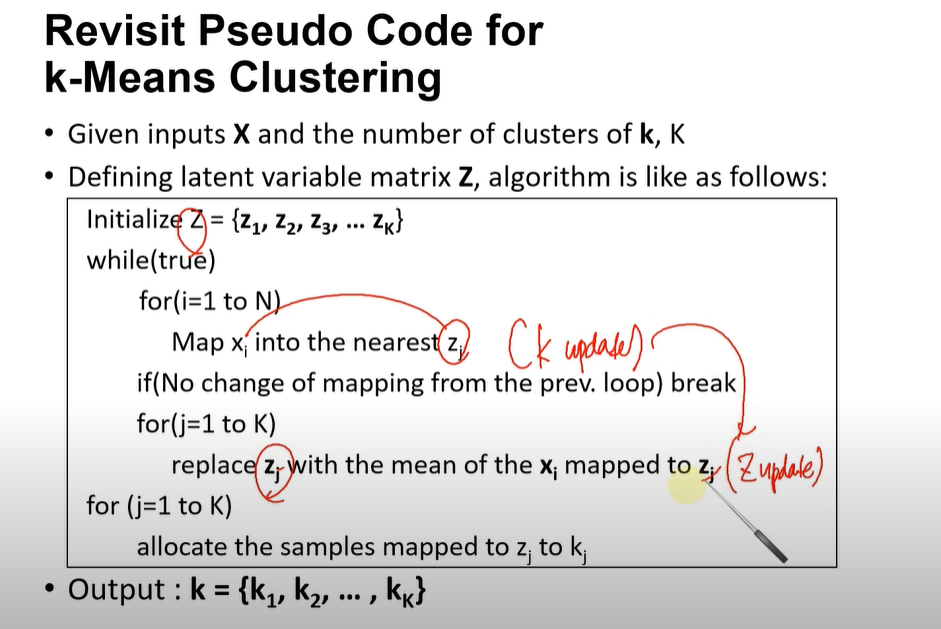

In [ ]:
[mx, sx] = [np.mean(x), np.std(x)]
[my, sy] = [np.mean(y), np.std(y)]
[mx, sx], [my, sy]

In [ ]:
z0 = np.array([mx+sx, my+sy]).reshape(1,2)
z1 = np.array([mx-sx, my-sy]).reshape(1,2)
Z = np.r_[z0, z1]
Z

In [ ]:
f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b')
ax1.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')

In [ ]:
numK = 2
N = len(x)
k = np.zeros(N)
j = 0
while(True):
    j += 1
    kOld = np.copy(k)
    for i in np.arange(N):
        z0D = np.linalg.norm(samples[i,:] - Z[0, :])
        z1D = np.linalg.norm(samples[i,:] - Z[1, :])
        k[i] = z0D > z1D
    if(np.alltrue(kOld == k)):
        break
    
    중간결과 = np.c_[x, y, k]
    cdf = pd.DataFrame(중간결과)
    cdf.columns = ["X", "Y", "K"]
    gdf = cdf.groupby("K")

    for cluster in range(numK):
        Z[cluster, :] = gdf.mean().iloc[cluster]

f2 = plt.figure(2)
ax2 = f2.add_subplot(111)
for (cluster, dataInCluster) in gdf:
    ax2.plot(dataInCluster.X, dataInCluster.Y, '.', label = cluster)

ax2.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')
ax2.legend()
print(j)

In [ ]:
# f1 = plt.figure(1)
# ax1 = f1.add_subplot(111)
# ax1.plot(x, y, 'b')
# ax1.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')

In [ ]:
# f2 = plt.figure(2)
# ax2 = f2.add_subplot(111)
# for (cluster, dataInCluster) in gdf:
#     ax2.plot(dataInCluster.X, dataInCluster.Y, '.', label = cluster)

# ax2.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')
# ax2.legend()

In [ ]:
# N = len(x)
# k = np.zeros(N)
# for i in np.arange(N):
#     z0D = np.linalg.norm(samples[i,:] - Z[0, :])
#     z1D = np.linalg.norm(samples[i,:] - Z[1, :])
# #     if (z0D < z1D):
# #         k[i] = 0
# #     else:
# #         k[i] = 1
#     k[i] = z0D > z1D
# k


In [ ]:
# 중간결과 = np.c_[x, y, k]
# 중간결과

In [ ]:
# cdf = pd.DataFrame(중간결과)
# cdf.columns = ["X", "Y", "K"]
# gdf = cdf.groupby("K")
# gdf

In [ ]:
# for (cluster, dataInCluster) in gdf:
#     print(dataInCluster)   # K = 0, K = 1에 따라서 클러스터링 결과 출력

In [ ]:
# z0, z1 업데이트 하기 (새로운 중심점 찾기)

In [ ]:
# numK = 2
# for cluster in range(numK):
#     Z[cluster, :] = gdf.mean().iloc[cluster]
# Z

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action='ignore') 
%matplotlib inline

In [ ]:
train_data = pd.read_csv("./dataset/train_data.csv")
features = ["air_end_temp", "motor_current"]

In [ ]:
X = train_data[features]

In [ ]:
sc = StandardScaler()
X[features] = sc.fit_transform(X)
X

In [ ]:
EM = GaussianMixture(n_components = 2)

In [ ]:
EM.fit(X)

In [ ]:
cluster = EM.predict(X)
cluster

In [ ]:
cluster_p = EM.predict_proba(X)
cluster_p

In [ ]:
sil_score = silhouette_score(X, cluster)
sil_score

In [ ]:
X['cluster'] = cluster
X.head()

In [ ]:
!pip uninstall pandas


In [ ]:
!pip install pandas==0.19.2

In [ ]:
from plotnine import *
from ggplot import * 


(ggplot(X, aes(x='air_end_temp', y='motor_current', color='cluster'))*geom_point())